# Introducción a la Minería de Textos

### Docente: M.Sc. Richard Fernández

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import re
import string
import io
import nltk

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

In [23]:
!pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 842.3 kB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
data = pd.read_csv('D:/Bases/Twitter/muñoz.csv')

In [11]:
data.head(5)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Me queda en la memoria el recuerdo de nuestras...,False,42,JorgeMunozPe,2022-05-27 00:15:43,True,1.529980e+18,1529979628638437376,163504378.0,"<a href=""http://twitter.com/download/iphone"" r...",JorgeMunozPe,0,False,False,NaN,NaN
1,Me embarga una pena muy grande saber que Lucy ...,False,76,NaN,2022-05-27 00:15:41,True,NaN,1529979618702200832,NaN,"<a href=""http://twitter.com/download/iphone"" r...",JorgeMunozPe,8,False,False,NaN,NaN
2,"Los detractores se basarán en una foto, en un ...",False,226,JorgeMunozPe,2022-05-24 22:16:20,True,1.529225e+18,1529224809145434112,163504378.0,"<a href=""http://twitter.com/download/iphone"" r...",JorgeMunozPe,18,False,False,NaN,NaN
3,"Una obra que soñamos, ejecutamos y que ya es u...",False,608,NaN,2022-05-24 22:16:18,True,NaN,1529224799276367873,NaN,"<a href=""http://twitter.com/download/iphone"" r...",JorgeMunozPe,37,False,False,NaN,NaN
4,Juzguen ustedes: ¿hay doble rasero? Para los a...,False,2227,NaN,2022-05-23 22:16:14,True,NaN,1528862394562539526,NaN,"<a href=""http://twitter.com/download/iphone"" r...",JorgeMunozPe,592,False,False,NaN,NaN


In [12]:
text_df = pd.DataFrame(data['text'])
text_df.head(5)

,text
0,Me queda en la memoria el recuerdo de nuestras...
1,Me embarga una pena muy grande saber que Lucy ...
2,"Los detractores se basarán en una foto, en un ..."
3,"Una obra que soñamos, ejecutamos y que ya es u..."
4,Juzguen ustedes: ¿hay doble rasero? Para los a...


In [13]:
def cleanUpTweet(txt):
  txt = txt.lower() #convierte a minúscula
  txt = re.sub(r'http\S+','',txt) #remueve páginas web
  txt = re.sub(r'http?:\/\/[A-Za-z0-9\.\/]+','',txt) #remueve urls
  txt = re.sub(r'www.\S+','',txt) #remueve www.
  txt = txt.translate(str.maketrans(r'[áéíóúÁÉÍÓÚ]', r'[aeiouAEIOU]')) # Remueve tíldes
  txt = txt.translate(str.maketrans(r'[ñÑ]', r'[nN]')) # Remueve ñs
  txt = re.sub(r'@[A-Za-z0-9_]+','',txt) #remueve menciones
  txt = re.sub(r'([@#][A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','',txt) #remueve hashtags
  txt = re.sub(r'(RT|retweet|from|via)((?:\\b\\W*@\\w+)+)','',txt) #remueve retweets
  txt = re.sub(r'\[.*?\]','',txt) #remueve caracteres especiales
  txt = re.sub(r'\n','',txt) #remueve \n
  txt = re.sub(r'[%s]' % re.escape(string.punctuation),'',txt) #remueve puntos
  txt = re.compile(r'\b(' + r'|'.join(stopwords.words('spanish')) + r')\b\s*').sub('',txt) #remueve stopwords
  txt = re.sub(r"\\s+",' ',txt) #remueves espacios en blanco
  return txt

In [14]:
text_df['text_clean'] = text_df['text'].apply(cleanUpTweet)
text_df.head(5)

,text,text_clean
0,Me queda en la memoria el recuerdo de nuestras...,queda memoria recuerdo conversaciones cada vez...
1,Me embarga una pena muy grande saber que Lucy ...,embarga pena grande saber lucy pacheco falleci...
2,"Los detractores se basarán en una foto, en un ...",detractores basaran foto momento especifico di...
3,"Una obra que soñamos, ejecutamos y que ya es u...",obra sonamos ejecutamos realidad paso desnivel...
4,Juzguen ustedes: ¿hay doble rasero? Para los a...,juzguen ustedes doble rasero amigos gobierno t...


In [15]:
#Eliminamos filas vacías
text_df = text_df.drop(text_df[text_df['text_clean'] == ''].index)
text_df.head(5)

,text,text_clean
0,Me queda en la memoria el recuerdo de nuestras...,queda memoria recuerdo conversaciones cada vez...
1,Me embarga una pena muy grande saber que Lucy ...,embarga pena grande saber lucy pacheco falleci...
2,"Los detractores se basarán en una foto, en un ...",detractores basaran foto momento especifico di...
3,"Una obra que soñamos, ejecutamos y que ya es u...",obra sonamos ejecutamos realidad paso desnivel...
4,Juzguen ustedes: ¿hay doble rasero? Para los a...,juzguen ustedes doble rasero amigos gobierno t...


In [18]:
text_df.head(15)

,text,text_clean
0,Me queda en la memoria el recuerdo de nuestras...,queda memoria recuerdo conversaciones cada vez...
1,Me embarga una pena muy grande saber que Lucy ...,embarga pena grande saber lucy pacheco falleci...
2,"Los detractores se basarán en una foto, en un ...",detractores basaran foto momento especifico di...
3,"Una obra que soñamos, ejecutamos y que ya es u...",obra sonamos ejecutamos realidad paso desnivel...
4,Juzguen ustedes: ¿hay doble rasero? Para los a...,juzguen ustedes doble rasero amigos gobierno t...
5,Agradezco la entrega y profesionalismo de mi s...,agradezco entrega profesionalismo sacrificado ...
6,Tengo la certeza de que las más de 1.000 obras...,certeza mas 1000 obras hechas quedan marcha ha...
7,La injusticia se ha consumado. Dejo el honroso...,injusticia consumado dejo honroso cargo alcald...
8,@RoberthJmz72 @Estrella030609 @unchasqui Le fa...,facilito busqueda vecino espero revise mate...
9,Con la conciencia tranquila y las manos limpia...,conciencia tranquila manos limpias hoy brinde ...


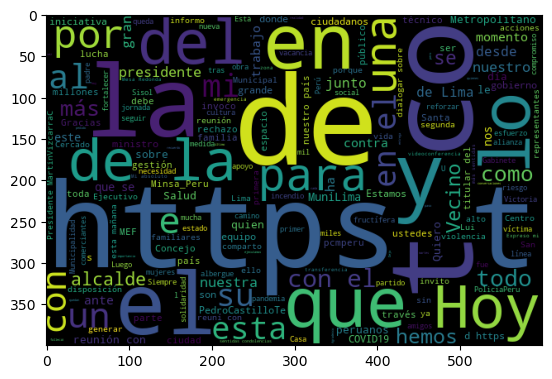

In [25]:
words = ' '.join([tweet for tweet in text_df['text']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

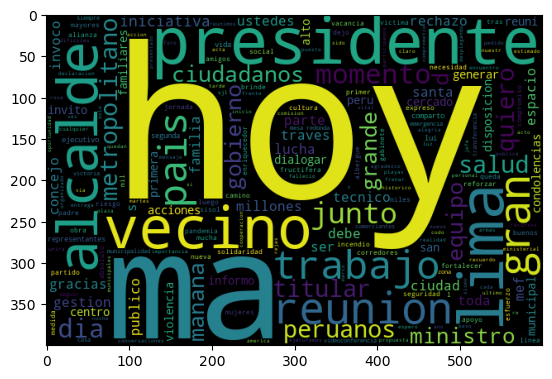

In [26]:
words = ' '.join([tweet for tweet in text_df['text_clean']])
wordCloud = WordCloud(width = 600,height=400).generate(words)
plt.imshow(wordCloud)
plt.show()